
# 线性回归例子
## 银行贷款预测系统:通过贷款人的信息预测可贷款额度


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
# 1. 读取数据
data = pd.read_csv("loan_dataset.csv")
print("数据预览：")
print(data.head())

数据预览：
   Age  Income  Credit Score    Loan Amount
0   41   79655           687   85279.431976
1   22  107689           812  109954.360822
2   52  112721           385  117018.718390
3   57   39944           667   41486.480819
4   54   68398           504   69370.015225


In [3]:
# 2. 提取特征和目标变量
X = data[["Age","Income","Credit Score"]].values
y = data["Loan Amount"].values

In [4]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # 创建 StandardScaler 对象
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [5]:
# 4. 创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)  # 训练模型

LinearRegression()

In [6]:
# 5. 预测
y_pred_train = model.predict(X_train)  # 训练集预测
y_pred_test = model.predict(X_test)    # 测试集预测
print('训练集预测结果：', y_pred_train)
print('训练集实际结果：', y_train)
print('测试集预测结果：', y_pred_test)
print('测试集实际结果：', y_test)


训练集预测结果： [ 58059.52830294 106719.3171828   36953.50539792  96648.42286092
  89361.44694858  44426.29654812 119926.12373559  68197.18619123
  36359.32771099 102372.38923711  90903.49221888  89902.91012422
  89900.16196583  83331.53270435  75831.0255437   50208.71150651
 111930.59694028  70696.43590951 105458.31783735  54126.75072126
  42478.78474661  69547.62630947  78209.30336857  85260.02231712
  70791.57270427 115057.46659855  98573.83378872  35177.12064705
 110561.36478685  94570.2048092   47859.96173999  81046.81965017
 107877.12065329 100464.14964551  83090.33759399  90254.97449152
  91296.70031587  74601.1769357   87761.33740814  83102.38960085
  45583.40288076  38481.02023345  53949.91230381  67728.28671911
  86945.10590914  72384.68430497  75978.0541602   49945.37467579
 104034.58232511  57645.63079657  58826.30781018  95372.14183425
  60313.0997932  105070.44911677 100416.05452278  84696.1061819
  42355.83016858  61062.36906258  54409.53454679  89230.64227189
  85304.35428279 

In [7]:
# 6. 评估模型
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"训练集均方误差 (MSE): {mse_train}")
print(f"测试集均方误差 (MSE): {mse_test}")
print(f"训练集 R² 分数: {r2_train}")
print(f"测试集 R² 分数: {r2_test}")

训练集均方误差 (MSE): 3521786.4005139004
测试集均方误差 (MSE): 3649129.779168026
训练集 R² 分数: 0.9946897958113418
测试集 R² 分数: 0.9942743784287298


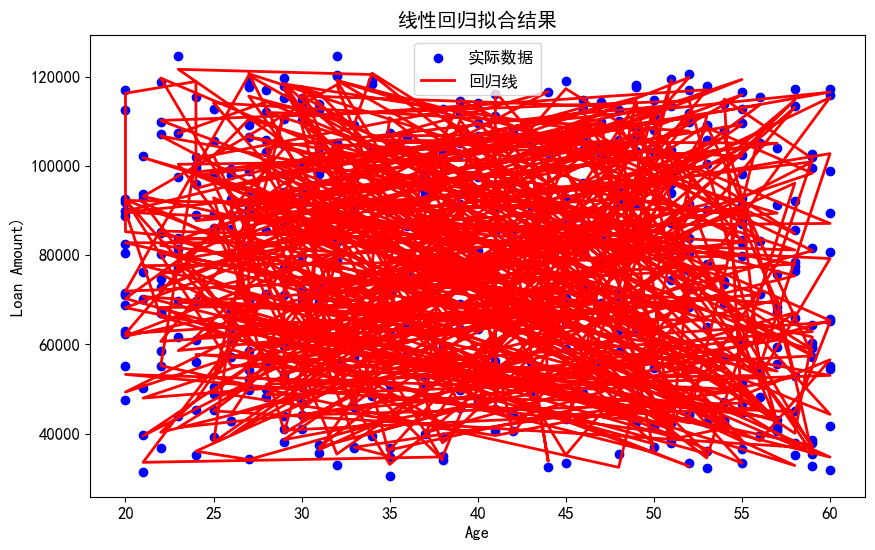

: 

In [8]:
# 7. 可视化结果
# 由于是多特征数据，我们选择一个特征（如年龄）进行可视化
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # Windows 系统使用黑体
matplotlib.rcParams['font.size'] = 12  # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.figure(figsize=(10, 6))
plt.scatter(data["Age"], data["Loan Amount"], color="blue", label="实际数据")
plt.plot(data["Age"], model.predict(X), color="red", linewidth=2, label="回归线")
plt.xlabel("Age")
plt.ylabel("Loan Amount)")
plt.title("线性回归拟合结果")
plt.legend()
plt.show()